In [100]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [101]:
#These are stop_words in common taken from internet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [103]:
#import the datset to be used and classify as training and testing data
from sklearn.datasets import fetch_20newsgroups
newsgroups_train=fetch_20newsgroups(subset='train')
newsgroups_test=fetch_20newsgroups(subset='test')
print("shape:\n{}".format(newsgroups_train.target_names))
x_train=newsgroups_train.data
x_test=newsgroups_test.data
y_train=newsgroups_train.target
y_test=newsgroups_test.target

shape:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [104]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))
# print("shape:\n{}".format(x_train.shape))

11314
7532


In [105]:
#Demonstrating re.split
sample_text="Hey! I am Tanmay. I am so happy. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Tanmay', 'I', 'am', 'so', 'happy', 'What', 'are', 'you', 'doing', 'there', '']


In [106]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'lerxst': 4,
 'wam': 81,
 'umd': 295,
 'edu': 21321,
 'thing': 1532,
 'subject': 12264,
 'car': 1311,
 'nntp': 4814,
 'posting': 5507,
 'host': 4996,
 'organization': 11233,
 'university': 5586,
 'maryland': 127,
 'college': 628,
 'park': 225,
 'lines': 11835,
 'wondering': 306,
 'anyone': 2467,
 'enlighten': 27,
 'saw': 550,
 'day': 1473,
 'door': 266,
 'sports': 169,
 'looked': 344,
 'late': 296,
 'early': 476,
 'called': 1154,
 'bricklin': 4,
 'doors': 90,
 'really': 2175,
 'small': 806,
 'addition': 290,
 'front': 474,
 'bumper': 35,
 'separate': 218,
 'rest': 489,
 'body': 541,
 'know': 5128,
 'can': 11355,
 'tellme': 2,
 'model': 453,
 'name': 1367,
 'engine': 376,
 'specs': 130,
 'years': 1919,
 'production': 134,
 'made': 1624,
 'history': 615,
 'whatever': 493,
 'info': 1093,
 'funky': 8,
 'looking': 1016,
 'please': 2202,
 'mail': 2058,
 'thanks': 1853,
 'brought': 297,
 'neighborhood': 37,
 'guykuo': 15,
 'carson': 107,
 'washington': 896,
 'guy': 519,
 'kuo': 25,
 'clock':

In [107]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 21321),
 ('not', 18424),
 ('subject', 12264),
 ('com', 12133),
 ('lines', 11835),
 ('can', 11355),
 ('organization', 11233),
 ('will', 9279),
 ('one', 9008),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5975),
 ('don', 5953),
 ('like', 5865),
 ('just', 5602),
 ('university', 5586),
 ('posting', 5507),
 ('know', 5128),
 ('host', 4996),
 ('get', 4952),
 ('nntp', 4814),
 ('max', 4690),
 ('think', 4578),
 ('also', 4306),
 ('use', 4183),
 ('time', 4093),
 ('new', 3971),
 ('good', 3758),
 ('well', 3478),
 ('may', 3310),
 ('even', 3279),
 ('now', 3210),
 ('see', 3064),
 ('two', 3015),
 ('way', 3002),
 ('god', 2994),
 ('first', 2974),
 ('many', 2943),
 ('make', 2894),
 ('much', 2876),
 ('system', 2817),
 ('distribution', 2766),
 ('right', 2739),
 ('world', 2721),
 ('say', 2704),
 ('want', 2515),
 ('anyone', 2467),
 ('reply', 2463),
 ('used', 2456),
 ('said', 2453),
 ('need', 2413),
 ('work', 2366),
 ('state', 2268),
 ('something', 2248),
 ('problem', 2224),
 ('please', 2202),
 (

In [108]:
import matplotlib.pyplot as plt


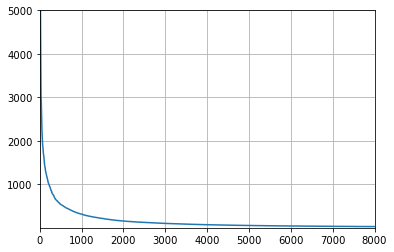

In [109]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [110]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'not',
 'subject',
 'com',
 'lines',
 'can',
 'organization',
 'will',
 'one',
 'writes',
 'article',
 'people',
 'don',
 'like',
 'just',
 'university',
 'posting',
 'know',
 'host',
 'get',
 'nntp',
 'max',
 'think',
 'also',
 'use',
 'time',
 'new',
 'good',
 'well',
 'may',
 'even',
 'now',
 'see',
 'two',
 'way',
 'god',
 'first',
 'many',
 'make',
 'much',
 'system',
 'distribution',
 'right',
 'world',
 'say',
 'want',
 'anyone',
 'reply',
 'used',
 'said',
 'need',
 'work',
 'state',
 'something',
 'problem',
 'please',
 'really',
 'computer',
 'off',
 'since',
 'mail',
 'year',
 'back',
 'believe',
 'still',
 'going',
 'file',
 'information',
 'windows',
 'help',
 'years',
 'using',
 'find',
 'take',
 'question',
 'last',
 'point',
 'space',
 'thanks',
 'must',
 'government',
 'never',
 'things',
 'better',
 'news',
 'might',
 'usa',
 'number',
 'another',
 'read',
 'sure',
 'program',
 'case',
 'etc',
 'without',
 'key',
 'david',
 'got',
 'drive',
 'made',
 'data',


In [111]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [112]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [113]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[2 0 1 ... 0 0 0]
 [3 0 1 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 ...
 [0 2 1 ... 0 0 0]
 [2 2 1 ... 0 0 0]
 [2 0 1 ... 0 0 0]]
--------------------------
[[2 0 1 ... 1 0 0]
 [2 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [4 0 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [115]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8483295032702846
Score on testing data: 0.7109665427509294
[[212   1   0   1   2   0   2   5   8   2   1   1   1   5   2  18   8   9
    2  39]
 [  4 264  10  12  21  14  17   5  10   3   0   1  11   8   6   0   0   1
    0   2]
 [  0  58 182  61  24  25  14   3   4   3   1   1   3   4   3   0   0   0
    0   8]
 [  0  16  13 234  60   1  21  10   2   1   0   2  30   0   2   0   0   0
    0   0]
 [  0  11  10  41 265   0  27   2   4   3   0   0  14   2   5   1   0   0
    0   0]
 [  0  83  14  17  14 231   8   1   2   2   1   5   8   4   5   0   0   0
    0   0]
 [  0   2   0  21  12   0 334   8   2   1   2   1   4   1   0   0   0   0
    1   1]
 [  1   2   1   2   5   1  16 317  26   0   3   0  12   1   5   0   0   0
    3   1]
 [  0   0   0   2   0   0   6  22 351   3   1   0   3   2   1   0   3   0
    3   1]
 [  2   4   0   1   1   0  14   6  12 330  17   0   4   4   1   0   1   0
    0   0]
 [  1   1   0   1   0   0   5   2   8  35 339   0   0   1   2   0

# Self Implementation of Naive Baye's

In [116]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [117]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [118]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [119]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [120]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [121]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [125]:
dictionary

{'total_doc': 11314,
 0: {'edu': 1207,
  'not': 1578,
  'subject': 537,
  'com': 556,
  'lines': 511,
  'can': 663,
  'organization': 456,
  'will': 419,
  'one': 696,
  'writes': 563,
  'article': 414,
  'people': 575,
  'don': 457,
  'like': 280,
  'just': 306,
  'university': 188,
  'posting': 309,
  'know': 277,
  'host': 236,
  'get': 141,
  'nntp': 237,
  'max': 0,
  'think': 391,
  'also': 178,
  'use': 89,
  'time': 220,
  'new': 88,
  'good': 187,
  'well': 238,
  'may': 153,
  'even': 236,
  'now': 158,
  'see': 226,
  'two': 95,
  'way': 197,
  'god': 707,
  'first': 131,
  'many': 262,
  'make': 177,
  'much': 146,
  'system': 213,
  'distribution': 67,
  'right': 158,
  'world': 170,
  'say': 319,
  'want': 95,
  'anyone': 104,
  'reply': 65,
  'used': 93,
  'said': 220,
  'need': 82,
  'work': 52,
  'state': 85,
  'something': 200,
  'problem': 71,
  'please': 77,
  'really': 127,
  'computer': 43,
  'off': 73,
  'since': 129,
  'mail': 24,
  'year': 18,
  'back': 65,
  '

In [126]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [127]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.7031332979288369
[[218   3   0   2   0   0   0   5   6   2   1   1   2   7   2  16   6   6
    6  36]
 [  4 269   7  12  24  15  15   5   9   3   0   1  12   6   5   0   0   0
    0   2]
 [  0  75 123  75  31  32  12   5   8   2   1   2  10  11   3   0   0   0
    1   3]
 [  0  24  11 221  65   0  16   8   1   1   0   1  44   0   0   0   0   0
    0   0]
 [  0  14   5  30 267   0  23   7   6   3   0   0  22   0   5   0   1   0
    1   1]
 [  0 101   8  14  17 222   8   5   4   1   0   4   8   1   1   1   0   0
    0   0]
 [  0   1   0  14   9   0 344   6   4   2   0   1   7   0   0   0   0   0
    2   0]
 [  1   5   0   0   2   0  17 318  29   2   1   0  12   1   4   0   1   0
    2   1]
 [  0   1   0   0   0   0   6  24 355   1   0   0   1   1   0   0   6   0
    2   1]
 [  1   5   0   1   1   0  15   7  12 331  15   0   4   3   1   1   0   0
    0   0]
 [  0   1   0   0   1   0   7   1   9  39 334   0   1   1   0   0   1   0
    3   1]
 [  1  11   1   3   6  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.7109 on testing_data,whereas self implemented classifier gave 0.7031 on testing data,which is very close.

